# Partie IV : Une étude plus globale des dépêches 

### Importation du jeu de données et nettoyage

In [1]:
import pandas as pd
data = pd.read_csv("abcnews-date-text.csv")

# Print the data
print(data)

c:\Users\CYTech Student\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


         publish_date                                      headline_text
0            20030219  aba decides against community broadcasting lic...
1            20030219     act fire witnesses must be aware of defamation
2            20030219     a g calls for infrastructure protection summit
3            20030219           air nz staff in aust strike for pay rise
4            20030219      air nz strike to affect australian travellers
...               ...                                                ...
1244179      20211231  two aged care residents die as state records 2...
1244180      20211231  victoria records 5;919 new cases and seven deaths
1244181      20211231    wa delays adopting new close contact definition
1244182      20211231  western ringtail possums found badly dehydrate...
1244183      20211231  what makes you a close covid contact here are ...

[1244184 rows x 2 columns]


In [3]:
# Transformer la date
data['publish_date'] = pd.to_datetime(data['publish_date'], format='%Y%m%d')

In [4]:
data.head()

,publish_date,headline_text
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise
4,2003-02-19,air nz strike to affect australian travellers


In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download the required resources
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

# Define the corpus and cleaning function
def corpus_and_cleaning(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # Join the tokens back into a string
    cleaned_text = ' '.join(lemmatized_tokens)
    
    return cleaned_text

In [10]:
databis = pd.read_csv("abcnews-date-text_cleaned.csv")
data.publish_date = databis.publish_date
data.head()

,publish_date,headline_text,headline_text_cleaned
0,2003/02/19,aba decides against community broadcasting lic...,aba decides community broadcasting licence
1,2003/02/19,act fire witnesses must be aware of defamation,act fire witness must aware defamation
2,2003/02/19,a g calls for infrastructure protection summit,g call infrastructure protection summit
3,2003/02/19,air nz staff in aust strike for pay rise,air nz staff aust strike pay rise
4,2003/02/19,air nz strike to affect australian travellers,air nz strike affect australian traveller


In [4]:
data['headline_text_cleaned'] = databis['headline_text_cleaned']

In [5]:
# Application de la fonction de nettoyage
data['headline_text_cleaned'] = data['headline_text'].apply(corpus_and_cleaning)

print(data['headline_text_cleaned'])


0                 aba decides community broadcasting licence
1                     act fire witness must aware defamation
2                    g call infrastructure protection summit
3                          air nz staff aust strike pay rise
4                  air nz strike affect australian traveller
                                 ...                        
1244179      two aged care resident die state record 2 ; 093
1244180         victoria record 5 ; 919 new case seven death
1244181       wa delay adopting new close contact definition
1244182    western ringtail possum found badly dehydrated...
1244183                    make close covid contact new rule
Name: headline_text_cleaned, Length: 1244184, dtype: object


# Statistiques sur les fréquences des mots

In [5]:
# Compter le nombre d'occurences de chaque mot
word_counts = data['headline_text_cleaned'].str.split(expand=True).stack().value_counts()

# Calculer les statistiques descriptives 
maximum = word_counts.max()
minimum = word_counts.min()
mean = word_counts.mean()
variance = word_counts.var()
median = word_counts.median()
quantiles = word_counts.quantile([0.25, 0.5, 0.75])

# Renvoyer les résultats
print("Maximum:", maximum)
most_common_word = word_counts.idxmax()
print("The word with the highest number of iterations is:", most_common_word)
print("Mean:", mean)
print("Variance:", variance)
print("Median:", median)
print("Quantiles:", quantiles)

Maximum: 39857
The word with the highest number of iterations is: police
Mean: 69.10543950951735
Variance: 282681.3139221163
Median: 2.0
Quantiles: 0.25     1.0
0.50     2.0
0.75    10.0
Name: count, dtype: float64


Le mot le plus fréquent est présent 39857 fois dans le corpus. Il s'agit du mot "police".

En moyenne, les mots sont présents 69 fois dans le corpus.

50% des mots on une fréquence inférieure à 2 et 50% ont une fréquence supérieure à 2

## Wordcloud

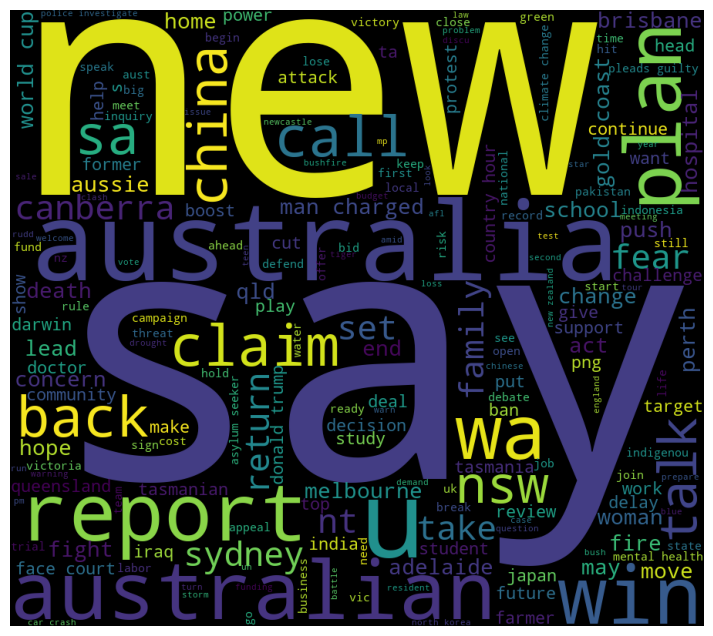

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Affichage du WordCloud
# Génération du WordCloud avec des dimensions plus grandes
wordcloud = WordCloud(width=900, height=800, margin=0).generate(data['headline_text_cleaned'].str.cat(sep='\n'))

# Affichage du WordCloud agrandi
plt.figure(figsize=(20, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
iteration_new = word_counts['police']
print("Nombre d'itérations de 'police':", iteration_new)


Number of iterations of 'police': 39857


In [ ]:
top_30_words = word_counts.nlargest(30
                                )
print(top_30_words)


police        39857
new           33734
man           31809
say           28906
u             20627
australia     20239
call          19634
plan          19480
council       19366
court         18559
fire          18256
govt          17104
win           16733
nsw           16577
back          16297
australian    16243
interview     16199
woman         16042
death         15598
crash         14143
sydney        13755
wa            13505
year          13487
water         13458
report        13062
get           12625
qld           12602
face          12288
health        11986
day           11903
dtype: int64


# Selon notre observation, on retrouve trois grandes catégories de mots dans les têtes d'affiche

### mot geographique (qld, australia, etc)
### mot commun (year, day,man...)
### mot lié à la politique(govt, court, police, council...)

# Evolution de la présence d'un mot au fil des années

In [18]:
data.publish_date = pd.to_datetime(data.publish_date, format='%Y/%m/%d')

In [19]:
data.head()

,publish_date,headline_text,headline_text_cleaned
0,2003-02-19,aba decides against community broadcasting lic...,aba decides community broadcasting licence
1,2003-02-19,act fire witnesses must be aware of defamation,act fire witness must aware defamation
2,2003-02-19,a g calls for infrastructure protection summit,g call infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise,air nz staff aust strike pay rise
4,2003-02-19,air nz strike to affect australian travellers,air nz strike affect australian traveller


In [ ]:
import matplotlib.pyplot as plt

In [12]:
def evolution_mot(mot, data):
    # Filtrer les données pour le mot spécifié
    word_data = data[data['headline_text'].str.contains(mot)]
    
    # Regrouper les données par année et compter les occurrences du mot
    word_counts = word_data.groupby(data['publish_date'].dt.year)['headline_text'].count()
    
    # Tracer l'évolution de la fréquence du mot
    word_counts.plot(kind='line', figsize=(10, 6))
    plt.xlabel('Année')
    plt.ylabel('Fréquence')
    plt.title(f'Évolution de la fréquence de "{mot}" au fil des années')
    plt.show()
    


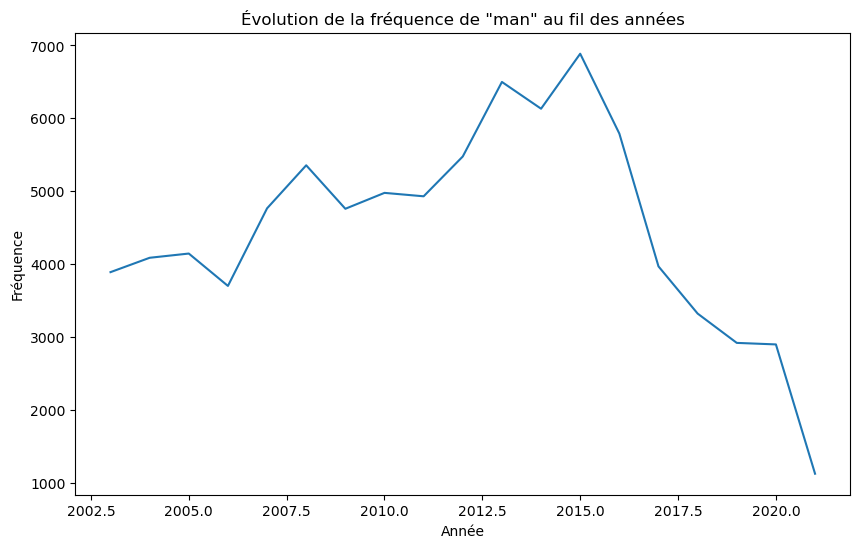

In [20]:
evolution_mot('man', data)

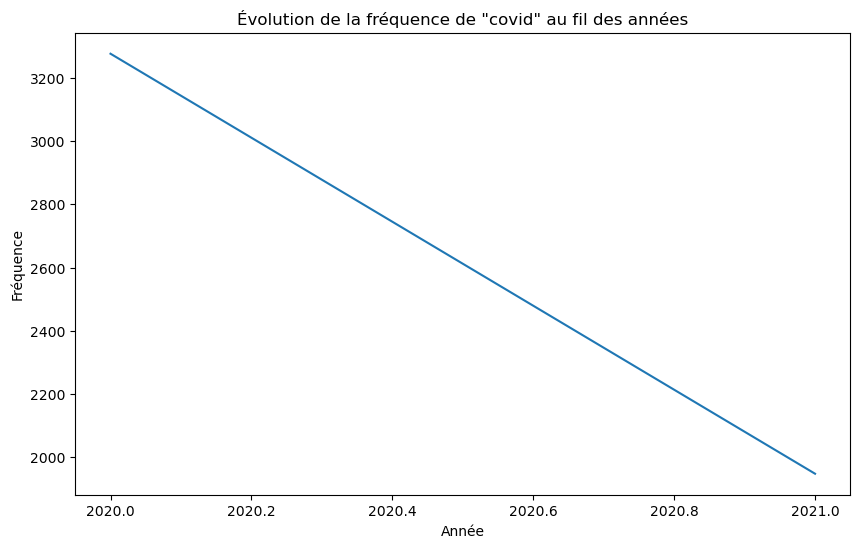

In [21]:
# Appel de la fonction evolution_mot() pour le mot 'covid'
evolution_mot('covid', data)

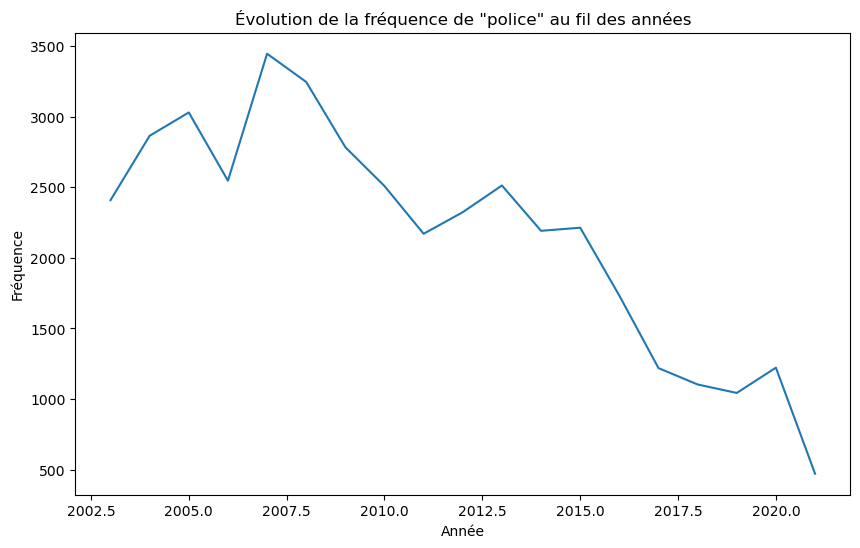

In [22]:
evolution_mot('police', data)

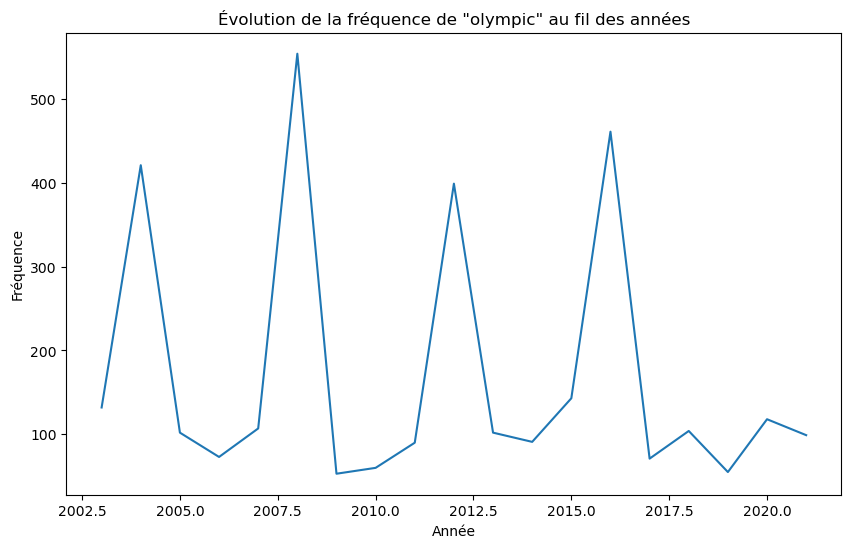

In [23]:
evolution_mot('olympic', data)

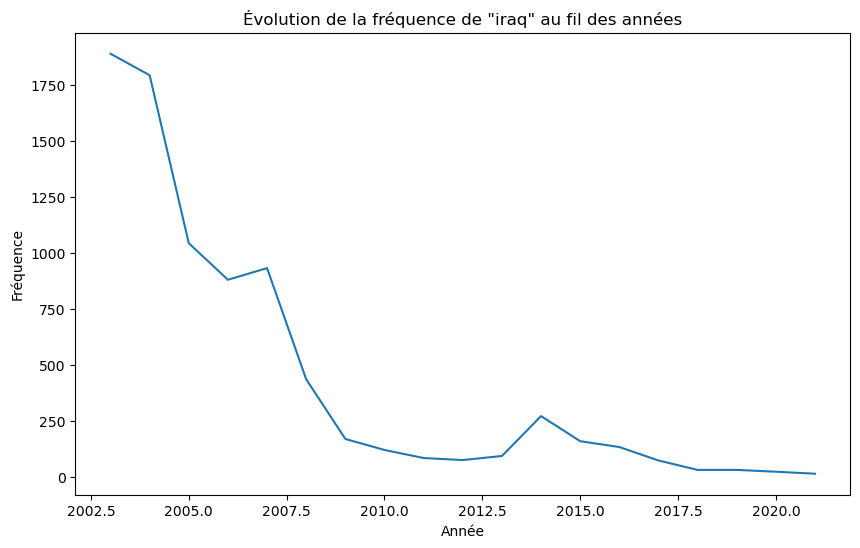

In [24]:
evolution_mot('iraq', data)

# LDA

In [29]:
# Importer la librairie pandas
import pandas as pd

data=pd.read_csv("abcnews-date-text_cleaned.csv")

In [30]:
# Supprimer les lignes avec des valeurs manquantes
data.dropna(subset=['headline_text_cleaned'], inplace=True)

In [31]:
data.isna().sum()

publish_date             0
headline_text            0
headline_text_cleaned    0
dtype: int64

In [32]:
# Imports
import pyLDAvis # Pour la visualisation
import pyLDAvis.gensim
import gensim
from gensim.utils import simple_preprocess
from gensim import models
from gensim import corpora

c:\Users\CYTech Student\anaconda3\Lib\site-packages\botocore\utils.py:15: DeprecationWarning: 'cgi' is deprecated and slated for removal in Python 3.13
  import cgi
c:\Users\CYTech Student\anaconda3\Lib\site-packages\botocore\httpsession.py:41: DeprecationWarning: 'urllib3.contrib.pyopenssl' module is deprecated and will be removed in a future release of urllib3 2.x. Read more in this issue: https://github.com/urllib3/urllib3/issues/2680
  from urllib3.contrib.pyopenssl import orig_util_SSLContext as SSLContext


In [33]:
# Définition de la fonction pour générer une visualisation LDA
def generate_lda_visualization(year, n_topics):
    # Filtration des données pour une année donnée
    data['publish_date'] = pd.to_datetime(data['publish_date'], format='%Y/%m/%d')
    headlines = pd.DataFrame(data[(data['publish_date'] > f'{year}/01/01') & (data['publish_date'] < f'{year}/12/31')]['headline_text_cleaned'])
    texts = headlines['headline_text_cleaned'].apply(simple_preprocess)

    # Création du dictionnaire à partir des textes
    dictionary = corpora.Dictionary(texts)
    dictionary.filter_extremes(no_below=5, no_above=0.5)

    # Création du corpus à partir du dictionnaire
    corpus = [dictionary.doc2bow(text) for text in texts]

    # Entraînement du modèle LDA
    lda_model = models.LdaModel(corpus=corpus, num_topics=n_topics)

    # Activation de la visualisation LDA dans le notebook
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
    vis.title = f"Visualisation LDA {year}"
    pyLDAvis.save_html(vis, f'LDAVisualization{year}.html')

    # Affichage de la visualisation LDA
    vis
    return vis

In [34]:
generate_lda_visualization(2003,3)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.267865  0.068972       1        1  34.893533
0      0.073222 -0.262723       2        1  33.230766
1      0.194644  0.193750       3        1  31.875702, topic_info=        Term         Freq        Total Category  logprob  loglift
297      man  1649.000000  1649.000000  Default  30.0000  30.0000
232    court  1265.000000  1265.000000  Default  29.0000  29.0000
457    world   854.000000   854.000000  Default  28.0000  28.0000
460     face   898.000000   898.000000  Default  27.0000  27.0000
72    report   958.000000   958.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
40   council   446.062597  1461.944483   Topic3  -5.3944  -0.0437
413      new   462.336426  1798.325444   Topic3  -5.3585  -0.2150
177     govt   449.484452  1698.646069   Topic3  -5.3867  -0.1862
41      iraq   380.198348  1023.079329   Topic3  -5.5541   0.1534
399    claim   345.699427   903.889806   Topic3  -5.6492   0.1822

[216 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2052      1  0.992798    abuse
2052      2  0.004683    abuse
231       2  0.996716  accused
566       1  0.011449   action
566       2  0.008587   action
...     ...       ...      ...
457       2  0.001170    world
457       3  0.997957    world
1218      1  0.944835     year
1218      2  0.038853     year
1218      3  0.017660     year

[365 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

In [37]:
for i in range(2003,2021,1):
    generate_lda_visualization(i,3)

In [25]:
# Importation du module webbrowser
import webbrowser
  
# Ouverture du fichier HTML LDA de 2003
webbrowser.open('LDAVisualization2003.html')

True

In [35]:
for i in range(2003,2021,1):
    webbrowser.open(f'LDAVisualization{i}.html')

Les sorties (des fichiers html) ci-dessus sont les représentations des topics calculés par l'algorithme LDA.

Pour un topic, on retrouve sa distribution sur les mots à droite lorsque qu'on survole ce topic. 

On observe en général trois topics assez distants dont un des thèmes récurrents est la police et le droit (les faits divers). Un autre thème récurrent concerne le gouvernement (gvmt, council).

Cependant, selon les années, on peut bien voir des mots faisant référence à des évenements ponctuels. Par exemple en 2003, on peut apercevoir qu'un des topics contient en grande partie les mots "world" et "cup", car en 2003 était organisée la coupe du monde de rugby en Australie. De la même manière, en 2020, on retrouve un topic constitué en grande partie par les mots "covid" et "coronavirus".

Le graphique permet de voir la distance entre les topics après réalisation d'une ACP et conservation des deux axes les plus représentatifs des données.

Nous avons choisi un nombre de topics de 3 car un plus grand nombre de topics entraînait une superposition des topics dans la représentation des distances inter-topics.